In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from scipy.fft import fft
from statsmodels.tsa.seasonal import seasonal_decompose
import os

# 자기상관 함수(AutoCorrelation Function)

<Figure size 1000x600 with 0 Axes>

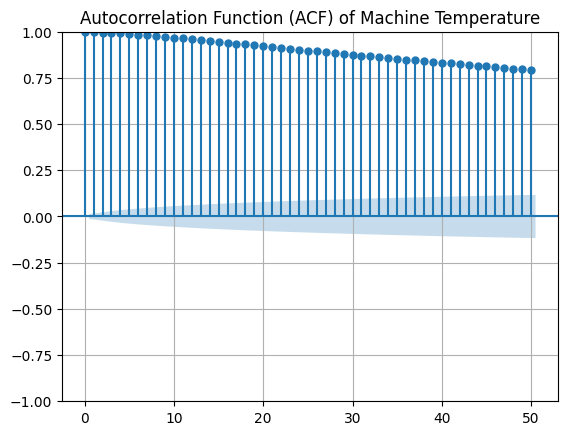

<Figure size 1000x600 with 0 Axes>

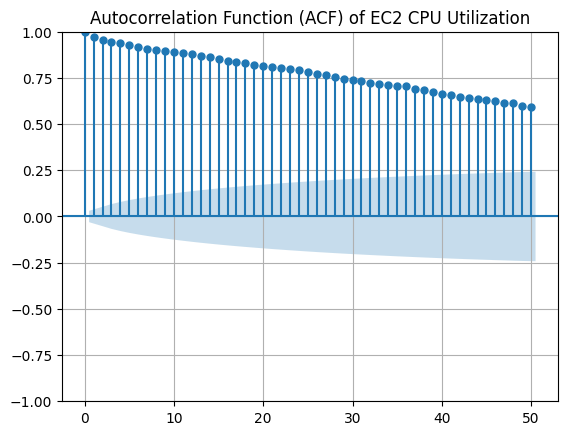

<Figure size 1000x600 with 0 Axes>

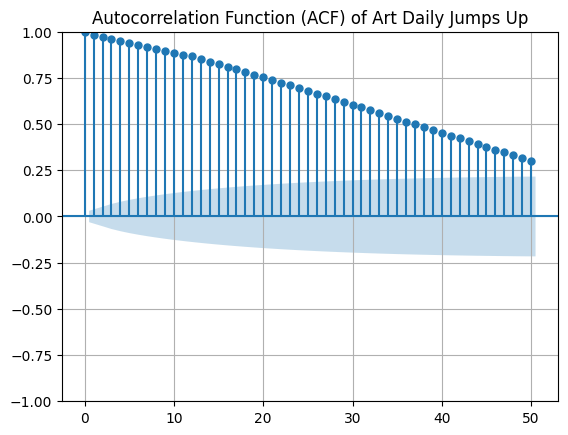

In [2]:
# Load your datasets
machine_temp_df = pd.read_csv('./NAB/data/realKnownCause/machine_temperature_system_failure.csv')
ec2_cpu_df = pd.read_csv('./NAB/data/realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv')
art_daily_jumpsup_df = pd.read_csv('./NAB/data/artificialWithAnomaly/art_daily_jumpsup.csv')

datasets = {
    "Machine Temperature": machine_temp_df,
    "EC2 CPU Utilization": ec2_cpu_df,
    "Art Daily Jumps Up": art_daily_jumpsup_df
}

# Plotting the autocorrelation function for each dataset to analyze seasonality
for name, df in datasets.items():
    # Identify the value column by excluding potential time columns
    value_column = [col for col in df.columns if 'time' not in col.lower() and 'date' not in col.lower()][0]

    plt.figure(figsize=(10, 6))
    plot_acf(df[value_column], lags=50, title=f"Autocorrelation Function (ACF) of {name}")
    plt.grid(True)
    plt.show()

# 주파수와 진폭(frequency and amplitude)

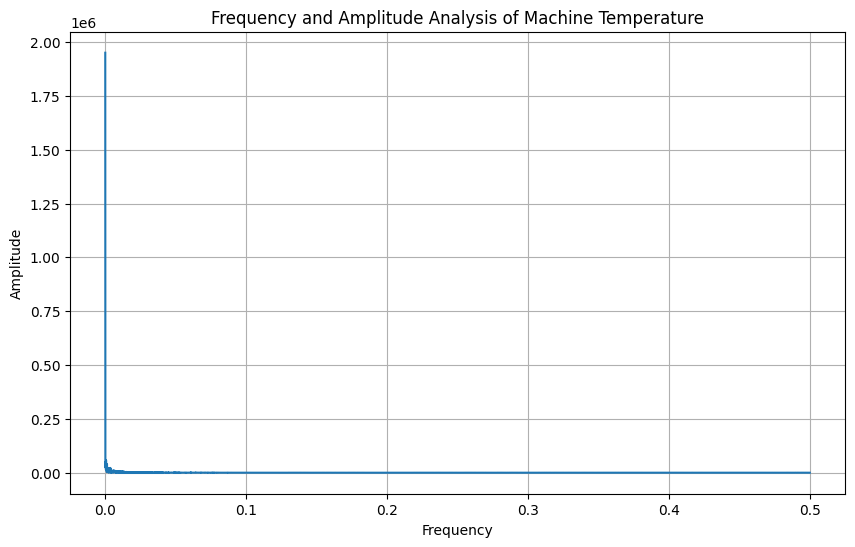

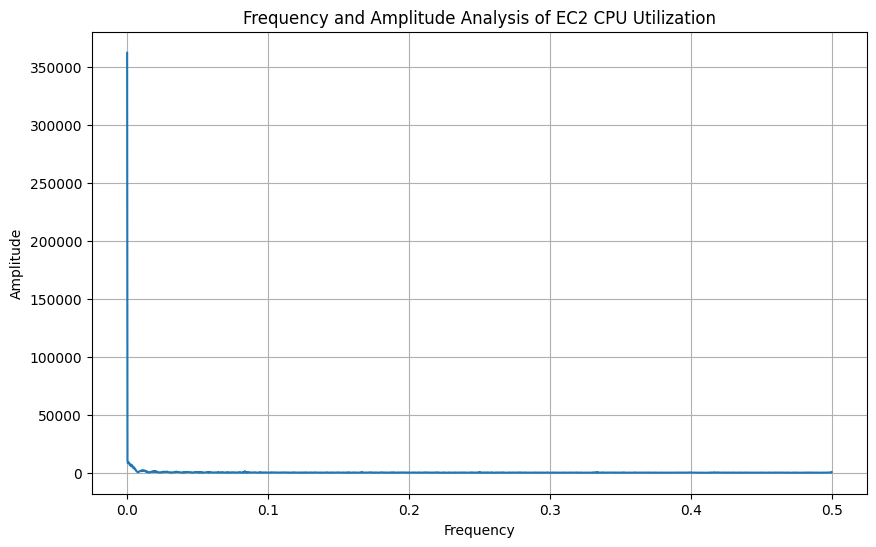

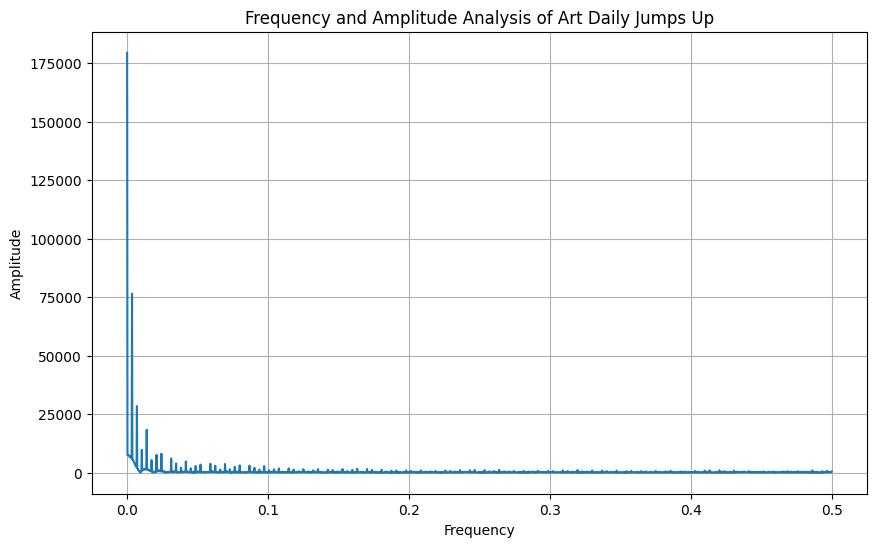

In [3]:
def analyze_frequency_amplitude(df, column_name):
    # Extract the data from the main value column
    data = df[column_name].values

    # Calculate the Fast Fourier Transform (FFT) to analyze frequency components
    fft_values = fft(data)
    n = len(data)
    frequency = np.fft.fftfreq(n)

    # Calculate amplitude
    amplitude = np.abs(fft_values)

    return frequency[:n // 2], amplitude[:n // 2]  # Return only the positive frequencies

# Analyze frequency and amplitude for each dataset's main value column
for name, df in datasets.items():
    # Identify the value column by excluding potential time columns
    value_column = [col for col in df.columns if 'time' not in col.lower() and 'date' not in col.lower()][0]
    frequency, amplitude = analyze_frequency_amplitude(df, value_column)

    # Plotting the frequency and amplitude
    plt.figure(figsize=(10, 6))
    plt.plot(frequency, amplitude)
    plt.title(f"Frequency and Amplitude Analysis of {name}")
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

# 푸리에 변환(Fourier Transform)

Frequency Analysis for Machine Temperature


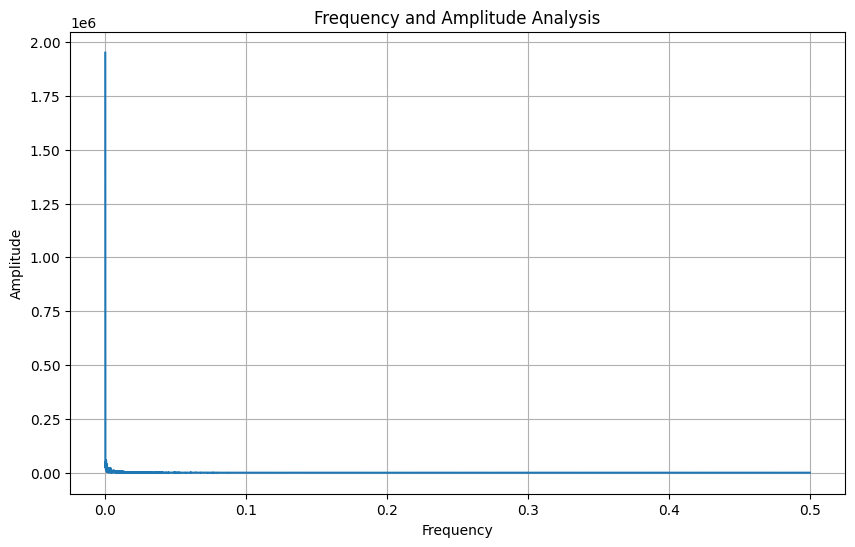

Frequency Analysis for EC2 CPU Utilization


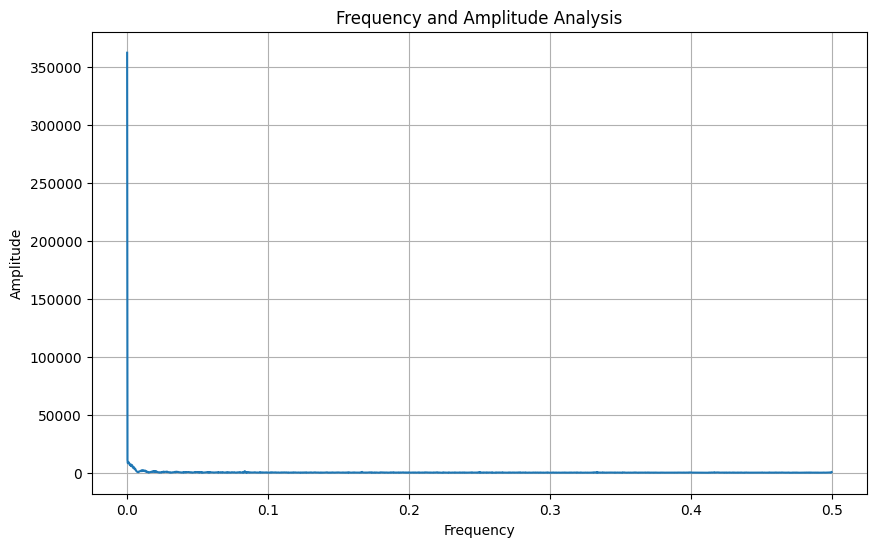

Frequency Analysis for Art Daily Jumps Up


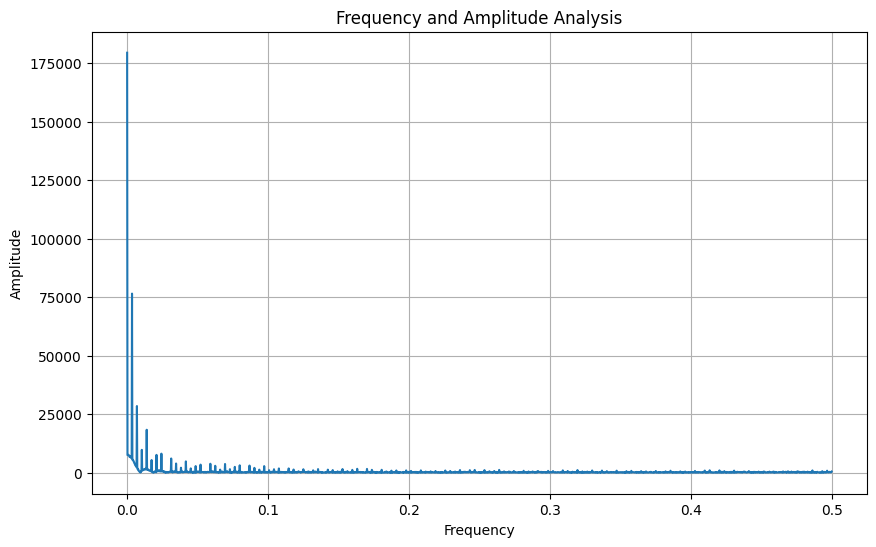

In [4]:
# Function to perform Fourier Transform and plot frequency domain analysis
def analyze_frequency(df, column_name):
    data = df[column_name].values

    # Apply Fast Fourier Transform (FFT)
    fft_values = fft(data)
    n = len(data)
    frequency = np.fft.fftfreq(n)

    # Calculate amplitude
    amplitude = np.abs(fft_values)

    # Plotting the frequency and amplitude
    plt.figure(figsize=(10, 6))
    plt.plot(frequency[:n // 2], amplitude[:n // 2])
    plt.title(f"Frequency and Amplitude Analysis")
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

# Analyze frequency for each dataset
for name, df in datasets.items():
    value_column = [col for col in df.columns if 'time' not in col.lower() and 'date' not in col.lower()][0]
    print(f"Frequency Analysis for {name}")
    analyze_frequency(df, value_column)

Saving Seasonal Decomposition for Machine Temperature as machine_temperature_seasonal_decomposition.png


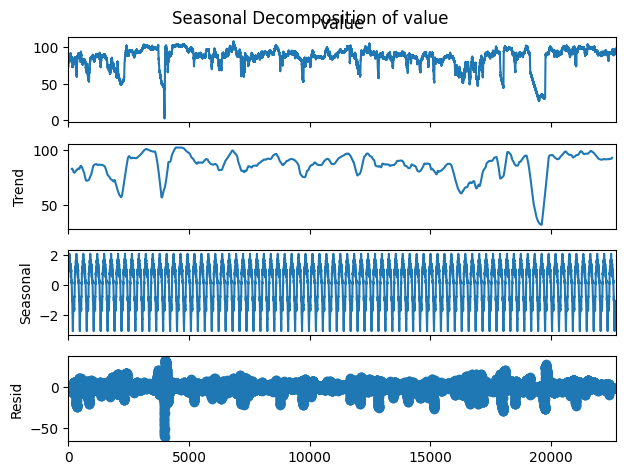

Saving Seasonal Decomposition for EC2 CPU Utilization as ec2_cpu_utilization_seasonal_decomposition.png


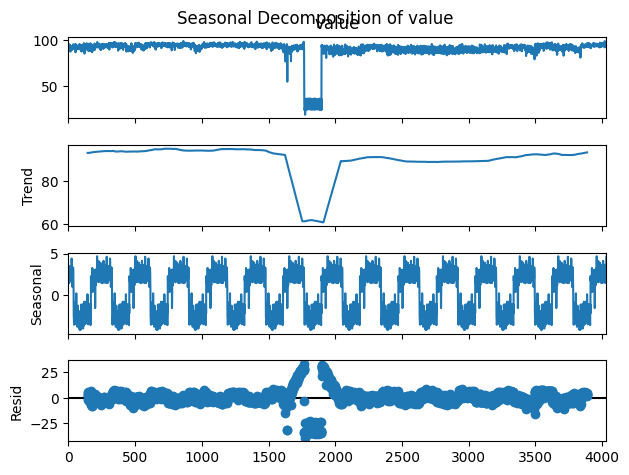

Saving Seasonal Decomposition for Art Daily Jumps Up as art_daily_jumps_up_seasonal_decomposition.png


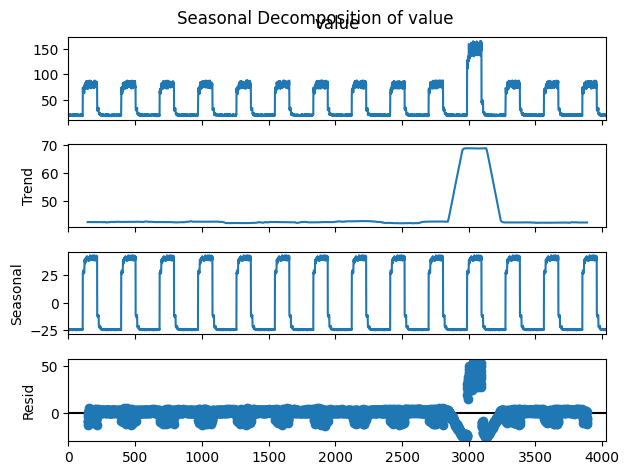

In [11]:
# Function to perform seasonal decomposition and save the plot as an image
def seasonal_decomposition(df, column_name, freq, filename):
    data = df[column_name]
    
    # Decompose the time series
    result = seasonal_decompose(data, model='additive', period=freq)
    
    # Plot the seasonal decomposition
    fig = result.plot()
    plt.suptitle(f"Seasonal Decomposition of {column_name}")
    
    # Save the figure to a files
    save_dir = 'EDA'
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, filename)
    plt.savefig(save_path)
    plt.show()
    plt.close()

# Perform seasonal decomposition for each dataset and save the results
for name, df in datasets.items():
    value_column = [col for col in df.columns if 'time' not in col.lower() and 'date' not in col.lower()][0]
    filename = f"{name.replace(' ', '_').lower()}_seasonal_decomposition.png"
    print(f"Saving Seasonal Decomposition for {name} as {filename}")
    seasonal_decomposition(df, value_column, freq=288, filename=filename)